<h1 align:center>Models Report</h1>


| Model        | Training time (seconds)| Inference Time (seconds) |Auc Roc|
|:--------------:|:--------------:|:------------------:|:--------------:|
| Logistic Regression| 12.2467 | <b>0.0317</b>|  0.6438|        
| Random Forest | 72.8302| 0.7444 |0.6213|        
| AdaBoost    | 51.8625| 1.0449|0.6141|        
| XGBoost    | 12.2276| 0.1005|0.6343|        
| CatBoost      |43.6527|5.17238|0.6438|        
| LightGBM      |<b>2.0324</b>|0.0627|0.6398|        
| Enssemble (Soft) |187.5631|5.7998|<b>0.6510</b>|        
| Neuronal Network|117.4240|5.5034|0.6452|        

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import time
from model.evaluation import get_model_metrics

# Models
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from keras.models import Sequential
from keras.layers import Dense

2022-07-26 21:28:08.038368: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-26 21:28:08.038652: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
cls1 = LogisticRegression(random_state=1)
cls2 = RandomForestClassifier(random_state=1)
cls3 = AdaBoostClassifier(random_state=1)
cls4 = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False,
                     random_state=1)
cls5 = CatBoostClassifier(random_state=1, logging_level = 'Silent')
cls6 = lgb.LGBMClassifier(random_state=1)

cls7 = VotingClassifier(
            estimators=[
            ('lgr', cls1),
            ('rf', cls2),
            ('adb', cls3),
            ('xgb', cls4),
            ('cat', cls5),
            ('lgm', cls6)
            ],
    
            voting='soft',
            weights=[1, 1 , 1, 1, 1, 1])

cls8 = Sequential()
cls8.add(Dense(743, input_shape=(743,), activation='relu'))
cls8.add(Dense(1486,activation="relu"))
cls8.add(Dense(1, activation='sigmoid'))
# Compile model
cls8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

2022-07-26 21:28:12.473046: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-26 21:28:12.473381: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-26 21:28:12.473475: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (4ff632562783): /proc/driver/nvidia/version does not exist


Getting data
Spliting the data
Training starts: 
Model name: LogisticRegression
Training time 12.24671 seconds
Prediction starts
Predicting time 0.03177 seconds
Metrics: 
Model Performance metrics:
------------------------------
Accuracy: 0.7335
Precision: 0.4523809523809524
Recall: 0.05043610163064088
F1 Score: 0.0907540088706926

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.98      0.84      7363
           1       0.45      0.05      0.09      2637

    accuracy                           0.73     10000
   macro avg       0.60      0.51      0.47     10000
weighted avg       0.67      0.73      0.65     10000


Prediction Confusion Matrix:
------------------------------
      0    1
0  7202  161
1  2504  133
----------------------------------------------------------------------------------------------------


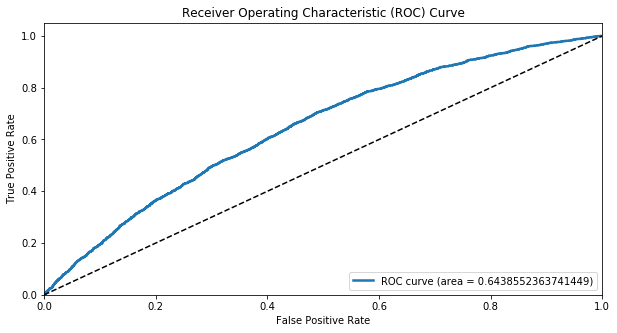

----------------------------------------------------------------------------------------------------
AUC ROC Result: 0.6438552363741449


In [3]:
get_model_metrics('../data/complete_data.csv', cls1 )

Getting data
Spliting the data
Training starts: 
Model name: RandomForestClassifier
Training time 72.83022 seconds
Prediction starts
Predicting time 0.74446 seconds
Metrics: 
Model Performance metrics:
------------------------------
Accuracy: 0.736
Precision: 0.49222797927461137
Recall: 0.0360257868790292
F1 Score: 0.06713780918727916

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7363
           1       0.49      0.04      0.07      2637

    accuracy                           0.74     10000
   macro avg       0.62      0.51      0.46     10000
weighted avg       0.68      0.74      0.64     10000


Prediction Confusion Matrix:
------------------------------
      0   1
0  7265  98
1  2542  95
----------------------------------------------------------------------------------------------------


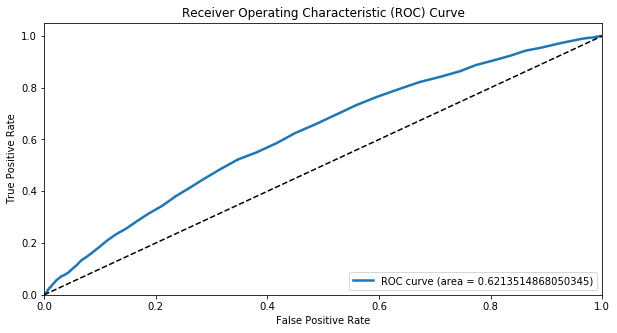

----------------------------------------------------------------------------------------------------
AUC ROC Result: 0.6213514868050345


In [4]:
get_model_metrics('../data/complete_data.csv', cls2 )

Getting data
Spliting the data
Training starts: 
Model name: AdaBoostClassifier
Training time 51.86252 seconds
Prediction starts
Predicting time 1.04496 seconds
Metrics: 
Model Performance metrics:
------------------------------
Accuracy: 0.7353
Precision: 0.4642857142857143
Recall: 0.02464922260144103
F1 Score: 0.04681310767014764

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7363
           1       0.46      0.02      0.05      2637

    accuracy                           0.74     10000
   macro avg       0.60      0.51      0.45     10000
weighted avg       0.67      0.74      0.64     10000


Prediction Confusion Matrix:
------------------------------
      0   1
0  7288  75
1  2572  65
----------------------------------------------------------------------------------------------------


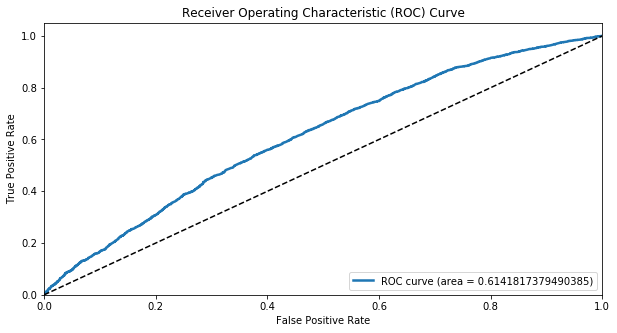

----------------------------------------------------------------------------------------------------
AUC ROC Result: 0.6141817379490385


In [5]:
get_model_metrics('../data/complete_data.csv', cls3 )

Getting data
Spliting the data
Training starts: 
Model name: XGBClassifier
Training time 12.22765 seconds
Prediction starts
Predicting time 0.10056 seconds
Metrics: 
Model Performance metrics:
------------------------------
Accuracy: 0.7338
Precision: 0.4584717607973422
Recall: 0.05233219567690557
F1 Score: 0.09394145677331517

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.98      0.84      7363
           1       0.46      0.05      0.09      2637

    accuracy                           0.73     10000
   macro avg       0.60      0.52      0.47     10000
weighted avg       0.67      0.73      0.65     10000


Prediction Confusion Matrix:
------------------------------
      0    1
0  7200  163
1  2499  138
----------------------------------------------------------------------------------------------------


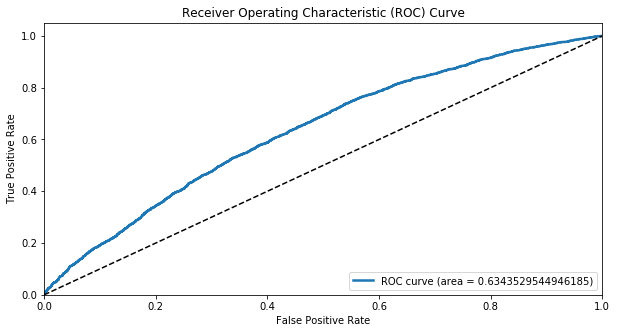

----------------------------------------------------------------------------------------------------
AUC ROC Result: 0.6343529544946185


In [11]:
get_model_metrics('../data/complete_data.csv', cls4 )

Getting data
Spliting the data
Training starts: 
Model name: CatBoostClassifier
Training time 43.65273 seconds
Prediction starts
Predicting time 5.17238 seconds
Metrics: 
Model Performance metrics:
------------------------------
Accuracy: 0.7365
Precision: 0.505
Recall: 0.03830109973454683
F1 Score: 0.07120197391610855

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7363
           1       0.51      0.04      0.07      2637

    accuracy                           0.74     10000
   macro avg       0.62      0.51      0.46     10000
weighted avg       0.68      0.74      0.64     10000


Prediction Confusion Matrix:
------------------------------
      0    1
0  7264   99
1  2536  101
----------------------------------------------------------------------------------------------------


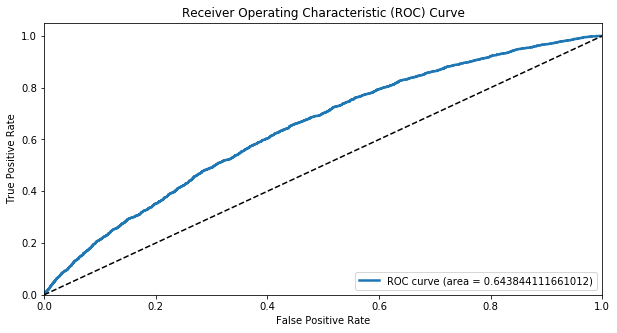

----------------------------------------------------------------------------------------------------
AUC ROC Result: 0.643844111661012


In [7]:
get_model_metrics('../data/complete_data.csv', cls5 )

Getting data
Spliting the data
Training starts: 
Model name: LGBMClassifier
Training time 2.03243 seconds
Prediction starts
Predicting time 0.06278 seconds
Metrics: 
Model Performance metrics:
------------------------------
Accuracy: 0.7356
Precision: 0.47651006711409394
Recall: 0.026924535456958665
F1 Score: 0.050969131371141424

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7363
           1       0.48      0.03      0.05      2637

    accuracy                           0.74     10000
   macro avg       0.61      0.51      0.45     10000
weighted avg       0.67      0.74      0.64     10000


Prediction Confusion Matrix:
------------------------------
      0   1
0  7285  78
1  2566  71
----------------------------------------------------------------------------------------------------


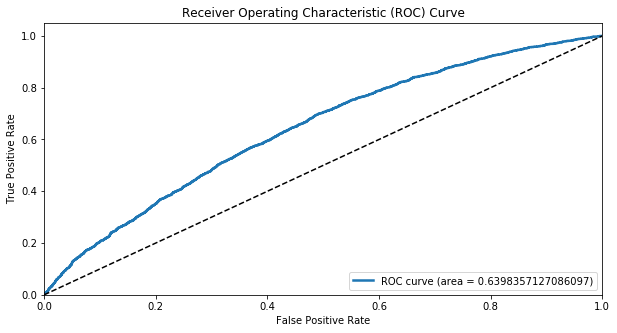

----------------------------------------------------------------------------------------------------
AUC ROC Result: 0.6398357127086097


In [9]:
get_model_metrics('../data/complete_data.csv', cls6 )

Getting data
Spliting the data
Training starts: 
Model name: VotingClassifier
Training time 187.56312 seconds
Prediction starts
Predicting time 5.79982 seconds
Metrics: 
Model Performance metrics:
------------------------------
Accuracy: 0.7365
Precision: 0.5087719298245614
Recall: 0.021994690936670457
F1 Score: 0.04216648491457651

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7363
           1       0.51      0.02      0.04      2637

    accuracy                           0.74     10000
   macro avg       0.62      0.51      0.44     10000
weighted avg       0.68      0.74      0.63     10000


Prediction Confusion Matrix:
------------------------------
      0   1
0  7307  56
1  2579  58
----------------------------------------------------------------------------------------------------


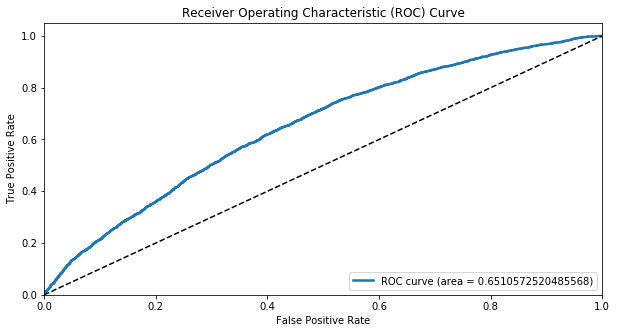

----------------------------------------------------------------------------------------------------
AUC ROC Result: 0.6510572520485568


In [10]:
get_model_metrics('../data/complete_data.csv', cls7 )

Getting data
Spliting the data
Training starts: 
Model name: Sequential
Epoch 1/3
1250/1250 [==============================] - 41s 32ms/step - loss: 0.5599 - auc: 0.6133
Epoch 2/3
1250/1250 [==============================] - 37s 30ms/step - loss: 0.5442 - auc: 0.6576
Epoch 3/3
1250/1250 [==============================] - 39s 31ms/step - loss: 0.5318 - auc: 0.6849
Training time 117.42405 seconds
Prediction starts
Predicting time 5.50341 seconds
Metrics: 
Model Performance metrics:
------------------------------
Accuracy: 0.7354
Precision: 0.4628099173553719
Recall: 0.02123625331816458
F1 Score: 0.04060913705583756

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7363
           1       0.46      0.02      0.04      2637

    accuracy                           0.74     10000
   macro avg       0.60      0.51      0.44     10000
weighted avg       0.67      0.74      0.63   

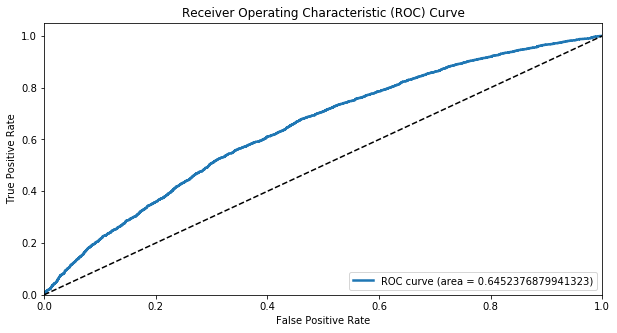

----------------------------------------------------------------------------------------------------
AUC ROC Result: 0.6452376879941323


In [3]:
get_model_metrics('../data/complete_data.csv', cls8 )